In [1]:
import os
import sys
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
f_mat = open('distmat.mat', 'rb')
f_g = open('g_path.pickle', 'rb')
f_q = open('q_path.pickle', 'rb')

distmat = pickle.load(f_mat)
query_path = pickle.load(f_q)
test_path = pickle.load(f_g)

In [34]:
query_path[0]

'data/../../data/image_query/000772.jpg'

In [49]:
def arr2txt(arr,path, query_map):
    f = open(path,'w')
    indices = arr[:,:100]
    for rnd in range(1052):
        true_id = int(query_map[str(rnd+1)])
        sort_idx = [int(idx) for idx in indices[true_id,:]]
        recall_id = [str(int(test_path[idx][5:].split('/')[-1][:-4])) for idx in sort_idx]
        line = ' '.join(recall_id)
        print(line)
        f.write(line+'\n')
        
    f.close()
    

In [3]:
def plot_images(imgs, rows=5):
    figure = plt.figure(figsize=(13, 8))
    cols = len(imgs) // rows + 1

    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        plt.imshow(imgs[i], cmap='gray')
        
def plot_images_for_filenames(filenames, rows=5):
    imgs = [plt.imread(filename) for filename in filenames]
    
    return plot_images(imgs, rows)

In [4]:
indices = np.argsort(distmat, axis=1)

In [5]:
# choose a random number from 1052 queries
rnd = 777

In [36]:
query_path

['data/../../data/image_query/000772.jpg',
 'data/../../data/image_query/000661.jpg',
 'data/../../data/image_query/000515.jpg',
 'data/../../data/image_query/001017.jpg',
 'data/../../data/image_query/000893.jpg',
 'data/../../data/image_query/000541.jpg',
 'data/../../data/image_query/000167.jpg',
 'data/../../data/image_query/000461.jpg',
 'data/../../data/image_query/000813.jpg',
 'data/../../data/image_query/000522.jpg',
 'data/../../data/image_query/000530.jpg',
 'data/../../data/image_query/000280.jpg',
 'data/../../data/image_query/000258.jpg',
 'data/../../data/image_query/000204.jpg',
 'data/../../data/image_query/000703.jpg',
 'data/../../data/image_query/000382.jpg',
 'data/../../data/image_query/000402.jpg',
 'data/../../data/image_query/000645.jpg',
 'data/../../data/image_query/000331.jpg',
 'data/../../data/image_query/000335.jpg',
 'data/../../data/image_query/000072.jpg',
 'data/../../data/image_query/000607.jpg',
 'data/../../data/image_query/000837.jpg',
 'data/../.

In [48]:
query_map = dict()
for i,q in enumerate(query_path):
    query_map[str(int(q.split('/')[-1][:-4]))]   = i
    print(str(int(q.split('/')[-1][:-4])),i)

772 0
661 1
515 2
1017 3
893 4
541 5
167 6
461 7
813 8
522 9
530 10
280 11
258 12
204 13
703 14
382 15
402 16
645 17
331 18
335 19
72 20
607 21
837 22
984 23
768 24
447 25
434 26
13 27
901 28
1038 29
806 30
125 31
114 32
219 33
704 34
640 35
979 36
814 37
538 38
38 39
333 40
278 41
17 42
298 43
1005 44
528 45
924 46
27 47
149 48
950 49
104 50
699 51
443 52
246 53
385 54
589 55
627 56
651 57
109 58
244 59
51 60
942 61
270 62
90 63
290 64
966 65
394 66
25 67
902 68
223 69
839 70
514 71
372 72
729 73
570 74
730 75
198 76
420 77
600 78
861 79
913 80
896 81
94 82
249 83
982 84
303 85
507 86
889 87
324 88
537 89
566 90
325 91
136 92
778 93
842 94
42 95
215 96
312 97
210 98
489 99
762 100
1018 101
649 102
843 103
506 104
134 105
449 106
802 107
657 108
970 109
206 110
625 111
592 112
961 113
77 114
159 115
252 116
193 117
636 118
373 119
87 120
686 121
644 122
852 123
365 124
788 125
786 126
890 127
539 128
407 129
300 130
967 131
80 132
45 133
639 134
440 135
549 136
503 137
1021 138
302 139

617 1046
239 1047
339 1048
213 1049
241 1050
453 1051


In [45]:
len(query_map.items())

1052

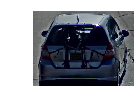

In [6]:
plot_images_for_filenames([query_path[rnd][5:]])

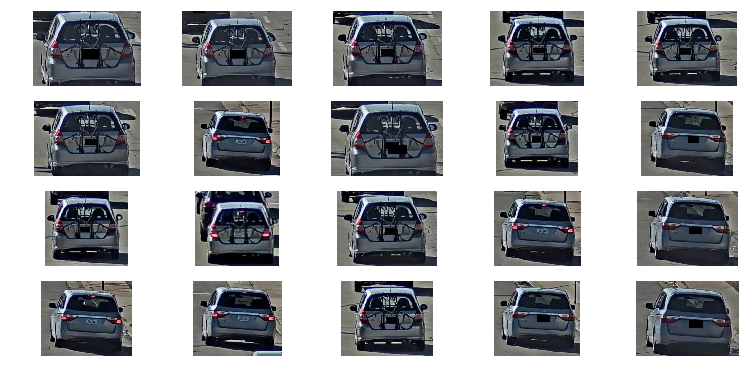

In [17]:
sort_idx = [int(idx) for idx in indices[rnd,:20]]
recall_path = [test_path[idx][5:] for idx in sort_idx]
recall_id = [test_path[idx][5:].split('/')[-1][:-4] for idx in sort_idx]
recall_id
plot_images_for_filenames(recall_path,rows=5)

In [29]:
indices.shape

(1052, 18290)

In [50]:
arr2txt(indices,'baseline.txt',query_map)

3696 10356 12072 8589 14663 3684 12941 14733 11793 963 11357 3089 17857 11903 6834 6068 10078 17045 2981 9921 11101 10267 12782 2631 13877 8158 11961 12772 5961 5034 11754 14505 17090 8807 8404 9837 17205 3602 1139 11866 2828 6811 17796 67 7412 4981 12770 7892 5295 15159 9311 17355 1248 8944 8869 17546 5527 3250 13664 1043 17158 5192 1072 14192 13039 5376 17047 5355 14290 16494 2703 3608 6751 15020 15391 7833 9771 6543 3533 3260 1785 6816 11071 3506 11551 16358 5841 68 16670 7876 9990 1522 15064 12107 1023 3962 9416 11930 15454 13715
3576 15453 8746 4349 1793 13362 850 15190 13550 12240 7227 16222 12643 8941 11407 7333 1101 6882 3125 12413 2265 7924 6101 6923 13824 3860 18172 649 14583 14963 11561 7545 13005 17968 4101 1497 2839 7225 2401 11065 7969 7262 7527 968 11806 9049 4375 7986 172 9567 1807 17161 5051 5411 9691 14977 3840 5649 885 1284 1982 8990 2512 17789 4803 1664 16925 7232 5291 16797 13570 7487 13742 259 4866 11953 3456 8548 15409 1342 14936 1615 12842 11465 14158 15202 5137